In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from pathlib import Path
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from scipy.signal import find_peaks

In [2]:
file_path = 'kP_index_data.csv'

# Read the CSV using pandas
data = pd.read_csv(file_path, skiprows=1, header=None)
print(data.head())

      0  1  2   3
0  2016  1  0  60
1  2016  1  1  60
2  2016  1  2  60
3  2016  1  3  53
4  2016  1  4  53


In [3]:
plt.style.use('default')

In [4]:
data.describe()

,0,1,2,3
count,64320.000000,64320.000000,64320.00000,64320.000000
mean,2019.182836,177.583209,11.50000,16.175140
std,2.125590,106.347657,6.92224,12.340452
min,2016.000000,1.000000,0.00000,0.000000
25%,2017.000000,84.000000,5.75000,7.000000
50%,2019.000000,174.000000,11.50000,13.000000
75%,2021.000000,270.000000,17.25000,23.000000
max,2023.000000,366.000000,23.00000,83.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64320 entries, 0 to 64319
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       64320 non-null  int64
 1   1       64320 non-null  int64
 2   2       64320 non-null  int64
 3   3       64320 non-null  int64
dtypes: int64(4)
memory usage: 2.0 MB


In [6]:
#data[0]= pd.to_datetime(data[0])
# Concatenate the columns corresponding to YEAR (0), DOY (1), and HR (2) to form a timestamp string
data['timestamp'] = data[0].astype(str) + '-' + data[1].astype(str) + ' ' + data[2].astype(str) + ':00:00'

# Convert the timestamp string to a datetime object
data['datetime'] = pd.to_datetime(data['timestamp'], format='%Y-%j %H:%M:%S')

# Display the first few rows of the DataFrame
data.head()


,0,1,2,3,timestamp,datetime
0,2016,1,0,60,2016-1 0:00:00,2016-01-01 00:00:00
1,2016,1,1,60,2016-1 1:00:00,2016-01-01 01:00:00
2,2016,1,2,60,2016-1 2:00:00,2016-01-01 02:00:00
3,2016,1,3,53,2016-1 3:00:00,2016-01-01 03:00:00
4,2016,1,4,53,2016-1 4:00:00,2016-01-01 04:00:00


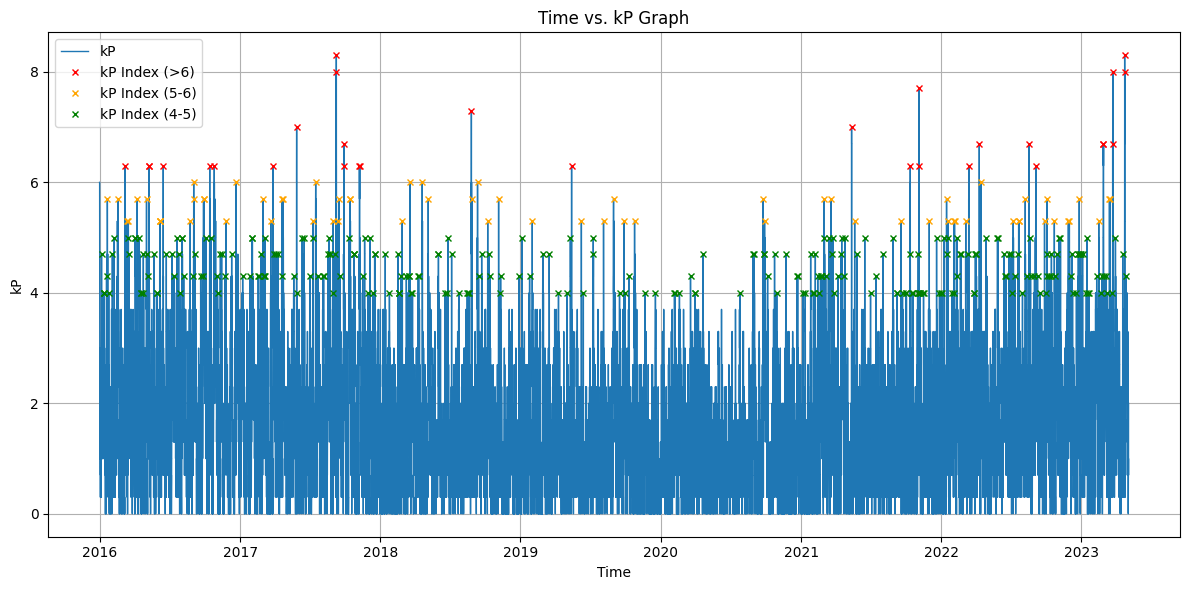

In [64]:

# Drop duplicate rows based on 'datetime' and 'kP' values
unique_data = data.drop_duplicates(subset=['datetime', 3])

# Locate the Peaks above a Magnitude of 5
peaks, _ = find_peaks(unique_data[3]/10, height=6.01, prominence=0.5)
peaks1, _ = find_peaks(unique_data[3]/10, height= (5.01, 6), prominence=3)
peaks2, _ = find_peaks(unique_data[3]/10, height= (4, 5), prominence=3)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(unique_data['datetime'], unique_data[3]/10, '-', label='kP', linewidth=1)#, marker='o')
plt.plot(unique_data['datetime'][peaks], unique_data[3][peaks]/10, "x", markersize=5, color='r',  label='kP Index (>6)')
plt.plot(unique_data['datetime'][peaks1], unique_data[3][peaks1]/10, "x", markersize=5, color='orange',  label='kP Index (5-6)')
plt.plot(unique_data['datetime'][peaks2], unique_data[3][peaks2]/10, "x", markersize=5, color='g',  label='kP Index (4-5)')

plt.title('Time vs. kP Graph')
plt.xlabel('Time')
plt.ylabel('kP')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()